# Regresja liniowa bez wykorzystania bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def regression_coef(X, y):
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    
    xy_cov = (X-x_mean)*(y-y_mean)
    x_var = (X-x_mean)**2
    
    a = xy_cov.sum() / x_var.sum()
    b = y_mean - a*x_mean
    
    return a, b

In [5]:
def regresssion_linear_plot(X, y, coefs):
    plt.figure(figsize=(10,6))
    plt.scatter(X, y, color='r', marker='o' , s=30)
    
    y_pred = coefs[0]*X + coefs[1]
    plt.plot(X, y_pred, color='b')

    plt.title('Linear Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid('on')
    plt.show()

In [7]:
np.random.seed(0)
n = 100
X = 10 * np.random.randn(n) - 5
y = 5*X + 10 + 20*np.random.randn(n)

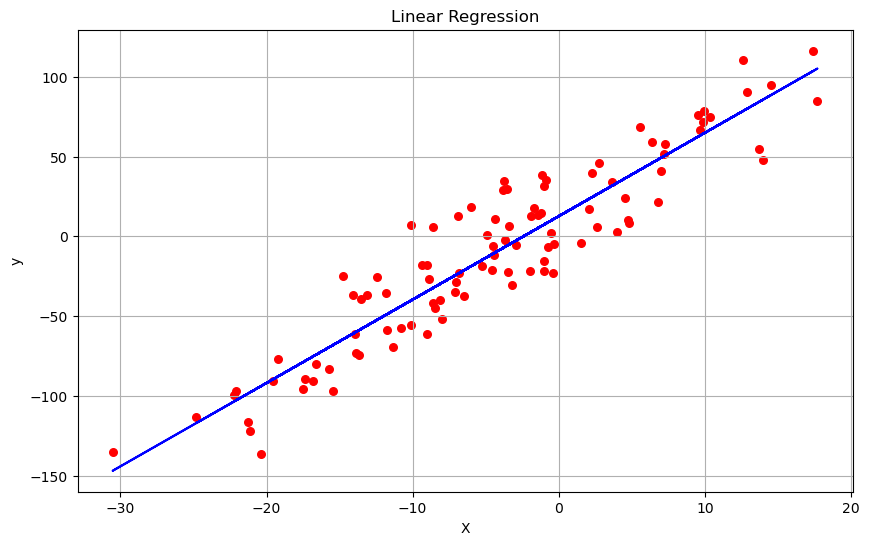

In [9]:
a, b = regression_coef(X, y)
coefs = (a, b)
regresssion_linear_plot(X, y, coefs)

# Regresja liniowa z zastosowaniem biblioteki scikit-learn

In [18]:
from sklearn.linear_model import LinearRegression

In [11]:
X.shape

(100,)

In [13]:
X.reshape(-1, 1).shape
# -1 na pierwszej pozycji znaczy, że nie liczba wierszy jest nieznana
# 1 na drugiej pozycji znaczy, że robimy jedną kolumnę

(100, 1)

In [22]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [80]:
model.coef_

array([[5.22939687]])

In [82]:
model.intercept_

array([12.65004604])

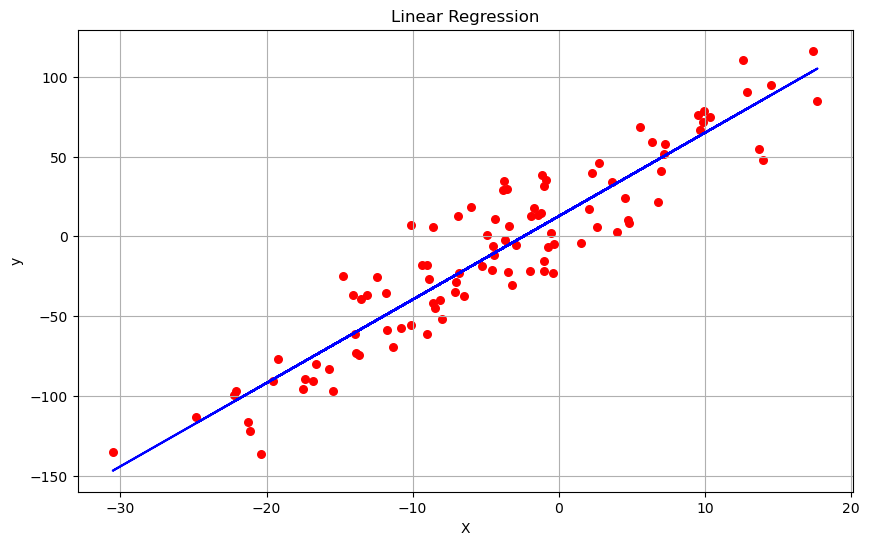

In [84]:
a, b = model.coef_[0], model.intercept_[0]
coefs = (a, b)
regresssion_linear_plot(X, y, coefs)

# Ocena jakości dopasowania modelu

Metryki:
- MSE
- RMSE
- MAE
- $R^2$

In [ ]:
y_pred = model.predict(X.reshape(-1,1))

Własna imlementacja metryk

In [123]:
R2_ = 1 - np.sum((y_pred - y.reshape(-1,1))**2)/np.sum((y.reshape(-1,1) - np.mean(y.reshape(-1,1)))**2)
MSE_ = np.mean((y_pred - y.reshape(-1,1))**2)
RMSE_ = MSE**0.5
MAE_ = np.mean(np.abs(y_pred - y.reshape(-1,1)))

In [125]:
print(f"R2_ = {R2_}; MSE_ = {MSE_}; RMSE_ = {RMSE_}; MAE_ = {MAE_}")

R2_ = 0.8678868895945004; MSE_ = 422.86874167625155; RMSE_ = 20.563772554574015; MAE_ = 17.318782770093545


Metryki z wykorzystaniem sklearn

In [127]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

R2 = r2_score(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = root_mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)

print(f"R2 = {R2}; MSE = {MSE}; RMSE = {RMSE}; MAE = {MAE}")

R2 = 0.8678868895945004; MSE = 422.86874167625155; RMSE = 20.563772554574015; MAE = 17.318782770093545


Porównanie wyników własnej implementacji oraz implementacji sklearn

In [130]:
print(f"R2_ - R2 = {R2_ - R2}; MSE_ - MSE = {MSE_ - MSE}; RMSE_ - RMSE = {RMSE_ - RMSE}; MAE_ - MAE = {MAE_ - MAE}")

R2_ - R2 = 0.0; MSE_ - MSE = 0.0; RMSE_ - RMSE = 0.0; MAE_ - MAE = 0.0
